In [1]:

!which python
import os
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


/opt/conda/bin/python


In [2]:


path = 'ICUDatasetProcessed/'
csvs = [file for file in os.listdir(path) if file.endswith('.csv')]

dfs = []

for csv in csvs:
    print(f'---- Reading {csv} ----')
    try:
        # reading the CSV
        df = pd.read_csv(os.path.join(path, csv))
        print(f'df.shape: {df.shape}')
        
        empty_cols = [col for col in df.columns if df[col].isnull().all()]
        print(f'empty_cols: {len(empty_cols)}')
        print(empty_cols)
        
        df.fillna(0, inplace=True)
        
        # Add the dataframe to the list
        dfs.append(df)
        print(f"Current dfs length: {len(dfs)}")
    except Exception as e:
        print(f"Error {csv}: {e}")

if dfs:
    common_columns = set.intersection(*(set(df.columns) for df in dfs))
    print(f"comon column for merge: {common_columns}")

    for col in common_columns:
        col_types = {df[col].dtype for df in dfs if col in df.columns}
        if len(col_types) > 1:
            print(f"Adjusting column '{col}' with different types: {col_types}")
            for df in dfs:
                if col in df.columns:
                    # Force all columns to type string by default
                    df[col] = df[col].astype(str)

    # Perform the merge
    try:
        merged_df = dfs[0]
        for df in dfs[1:]:
            merged_df = pd.merge(merged_df, df, on=list(common_columns), how='outer')
        print(f"Final merged_df shape: {merged_df.shape}")
    except ValueError as e:
        print(f"Merge error: {e}. Performing concatenation as a fallback.")
        merged_df = pd.concat(dfs, ignore_index=True)

else:
    print("none of file was reading.")



---- Reading Attack.csv ----


/tmp/ipykernel_904/348214584.py:10: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


df.shape: (80126, 52)
empty_cols: 0
[]
Current dfs length: 1
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
Current dfs length: 2
---- Reading patientMonitoring.csv ----


/tmp/ipykernel_904/348214584.py:10: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


df.shape: (76810, 52)
empty_cols: 0
[]
Current dfs length: 3
comon column for merge: {'tcp.len', 'tcp.flags.push', 'ip.proto', 'tcp.flags.urg', 'tcp.connection.rst', 'mqtt.conflag.reserved', 'ip.dst', 'tcp.pdu.size', 'mqtt.ver', 'frame.time_relative', 'mqtt.conflag.willflag', 'mqtt.conack.flags', 'tcp.ack', 'tcp.connection.syn', 'mqtt.kalive', 'tcp.hdr_len', 'mqtt.len', 'mqtt.retain', 'tcp.connection.fin', 'tcp.checksum', 'tcp.payload', 'mqtt.willmsg_len', 'tcp.flags.fin', 'mqtt.hdrflags', 'frame.len', 'mqtt.topic', 'tcp.srcport', 'tcp.dstport', 'tcp.flags.syn', 'class', 'label', 'mqtt.conflags', 'tcp.flags.ack', 'mqtt.dupflag', 'mqtt.conflag.qos', 'mqtt.qos', 'mqtt.conflag.retain', 'tcp.connection.sack', 'ip.src', 'tcp.flags.reset', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.clientid', 'tcp.flags', 'mqtt.msg', 'tcp.time_delta', 'mqtt.msgtype', 'tcp.window_size_value', 'mqtt.topic_len', 'mqtt.clientid_len', 'frame.time_delta', 'ip.ttl'}
Adjusting column 'tcp.pdu.size' with differe

In [3]:

# List of columns to keep
columns_to_keep = [
    "tcp.connection.fin", 
    "tcp.connection.rst", 
    "tcp.connection.sack", 
    "tcp.connection.syn", 
    "tcp.flags.ack", 
    "tcp.flags.fin",  
    "tcp.flags.push",
    "tcp.flags.reset",
    "tcp.flags.syn",
    "mqtt.conack.flags", 
    "mqtt.conflags", 
    #"mqtt.dupflags",
    "mqtt.qos",  
    "class", 
    "label"
]

# Check if merged_df exists and is a valid DataFrame
if 'merged_df' in locals() and isinstance(merged_df, pd.DataFrame):
    try:
        # # Reduce the DataFrame to the specified columns
        reduced_df = merged_df[columns_to_keep]
        print(f"Dataset reduced to {len(reduced_df.columns)} columns e {reduced_df.shape[0]} lines.")

        # Display basic information of the reduced DataFrame
        print(reduced_df.info())
        print(reduced_df.describe())

        # View first records
        import ace_tools as tools; tools.display_dataframe_to_user(name="Reduced Dataset", dataframe=reduced_df)

    except KeyError as e:
        print(f"Erro: One or more specified columns are not in the dataset. {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")
else:
    print("Erro: 'merged_df' does not contain a valid DataFrame or is not defined.")


Dataset reduced to 14 columns e 188694 lines.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188694 entries, 0 to 188693
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tcp.connection.fin   188694 non-null  float64
 1   tcp.connection.rst   188694 non-null  float64
 2   tcp.connection.sack  188694 non-null  float64
 3   tcp.connection.syn   188694 non-null  float64
 4   tcp.flags.ack        188694 non-null  int64  
 5   tcp.flags.fin        188694 non-null  int64  
 6   tcp.flags.push       188694 non-null  int64  
 7   tcp.flags.reset      188694 non-null  int64  
 8   tcp.flags.syn        188694 non-null  int64  
 9   mqtt.conack.flags    188694 non-null  object 
 10  mqtt.conflags        188694 non-null  object 
 11  mqtt.qos             188694 non-null  float64
 12  class                188694 non-null  object 
 13  label                188694 non-null  int64  
dtypes: float64(5), int64(6

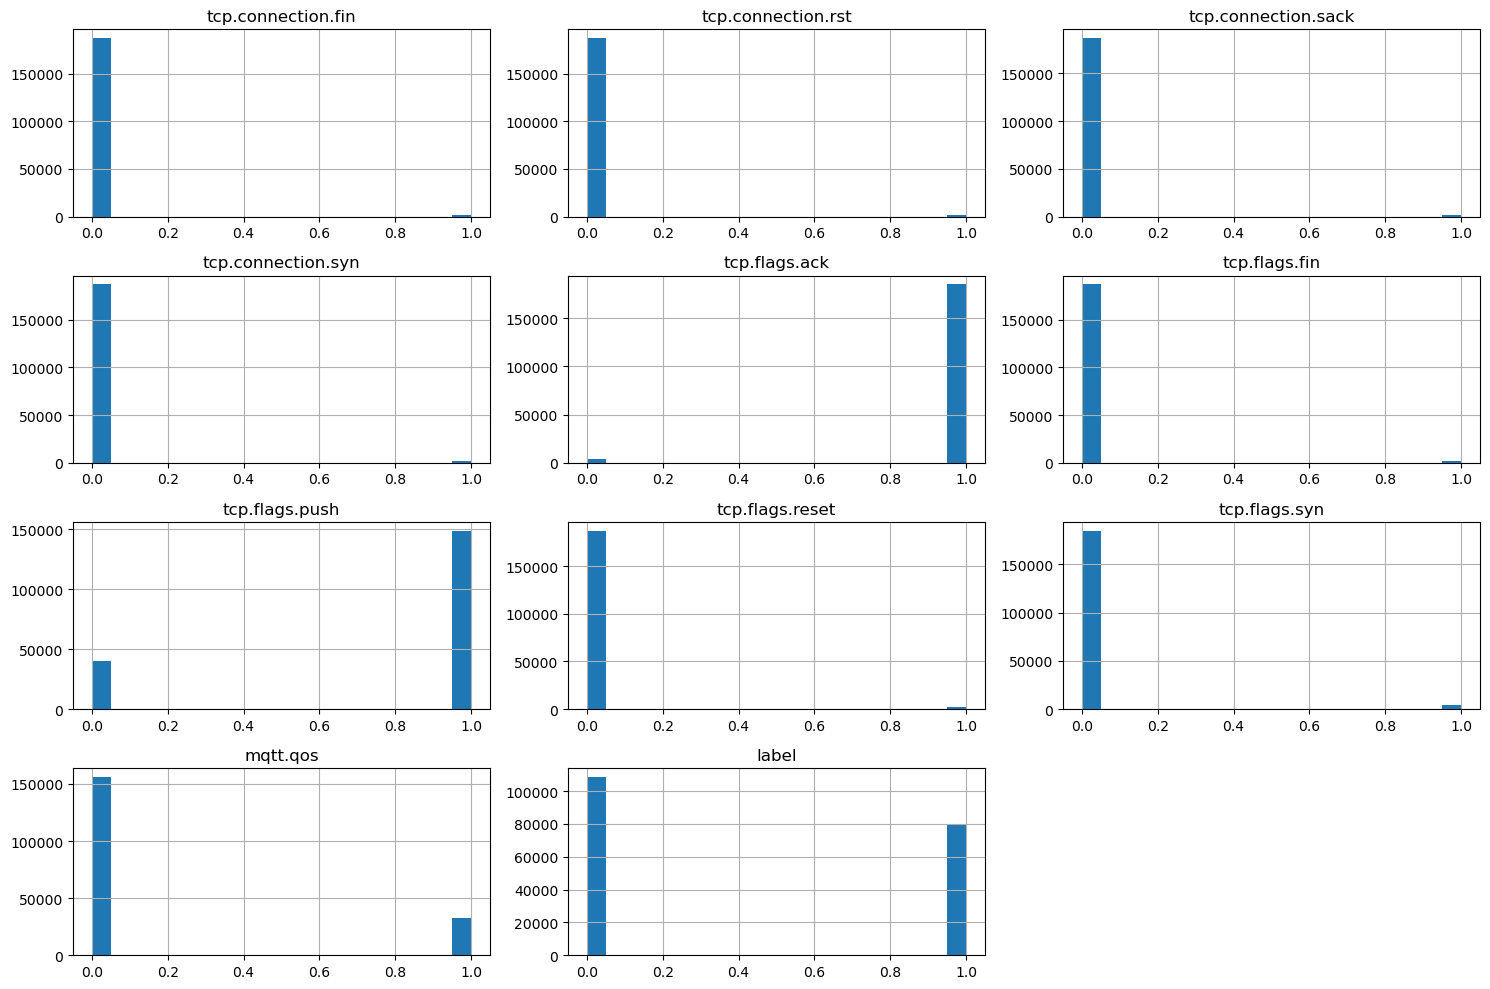

In [4]:
#!pip install matplotlib
import matplotlib.pyplot as plt

reduced_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


In [5]:
# Identify columns of type 'object'
object_columns = reduced_df.select_dtypes(include=['object']).columns
print(f"Columns with type 'object': {list(object_columns)}")

# Apply the conversion to each column
for col in object_columns:
    try:
        # First try converting to numeric with fallback to NaN
        reduced_df[col] = pd.to_numeric(reduced_df[col], errors='coerce')
        print(f"Column '{col}' converted to numeric (with NaN for invalid values).")
    except Exception as e:
        print(f"Error converting column '{col}' to numeric: {e}")

# Recheck remaining columns as 'object'
object_columns_after_numeric = reduced_df.select_dtypes(include=['object']).columns
print(f"Remaining columns like 'object': {list(object_columns_after_numeric)}")

# Convert remaining columns to coded categories
for col in object_columns_after_numeric:
    try:
        reduced_df[col] = reduced_df[col].astype('category').cat.codes
        print(f"Column '{col}' converted to coded categories.")
    except Exception as e:
        print(f"Error converting column '{col}' for categories: {e}")

# Display processed DataFrame information
print(reduced_df.info())


Columns with type 'object': ['mqtt.conack.flags', 'mqtt.conflags', 'class']
Column 'mqtt.conack.flags' converted to numeric (with NaN for invalid values).
Column 'mqtt.conflags' converted to numeric (with NaN for invalid values).
Column 'class' converted to numeric (with NaN for invalid values).
Remaining columns like 'object': []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188694 entries, 0 to 188693
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tcp.connection.fin   188694 non-null  float64
 1   tcp.connection.rst   188694 non-null  float64
 2   tcp.connection.sack  188694 non-null  float64
 3   tcp.connection.syn   188694 non-null  float64
 4   tcp.flags.ack        188694 non-null  int64  
 5   tcp.flags.fin        188694 non-null  int64  
 6   tcp.flags.push       188694 non-null  int64  
 7   tcp.flags.reset      188694 non-null  int64  
 8   tcp.flags.syn        188694 non-null  int

/tmp/ipykernel_904/2018556634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df[col] = pd.to_numeric(reduced_df[col], errors='coerce')


In [6]:
print("Remaining missing values ​​per column:\n", reduced_df.isnull().sum())

Remaining missing values ​​per column:
 tcp.connection.fin          0
tcp.connection.rst          0
tcp.connection.sack         0
tcp.connection.syn          0
tcp.flags.ack               0
tcp.flags.fin               0
tcp.flags.push              0
tcp.flags.reset             0
tcp.flags.syn               0
mqtt.conack.flags        1973
mqtt.conflags            1973
mqtt.qos                    0
class                  188694
label                       0
dtype: int64


In [7]:
# Replace missing values ​​with 0 for specified columns using .loc
reduced_df.loc[:, 'mqtt.conack.flags'] = reduced_df['mqtt.conack.flags'].fillna(0)
reduced_df.loc[:, 'mqtt.conflags'] = reduced_df['mqtt.conflags'].fillna(0)
print("Missing values ​​in columns 'mqtt.conack.flags' and 'mqtt.conflags' filled with 0.")

# Remove 'class' column (too many missing values)
if 'class' in reduced_df.columns:
    reduced_df = reduced_df.drop(columns=['class'])
    print("'class' column removed due to too many missing values.")

# Check again for missing values
print("Remaining missing values ​​per column after treatment:\n", reduced_df.isnull().sum())


Missing values ​​in columns 'mqtt.conack.flags' and 'mqtt.conflags' filled with 0.
'class' column removed due to too many missing values.
Remaining missing values ​​per column after treatment:
 tcp.connection.fin     0
tcp.connection.rst     0
tcp.connection.sack    0
tcp.connection.syn     0
tcp.flags.ack          0
tcp.flags.fin          0
tcp.flags.push         0
tcp.flags.reset        0
tcp.flags.syn          0
mqtt.conack.flags      0
mqtt.conflags          0
mqtt.qos               0
label                  0
dtype: int64


In [8]:
# Chosen the normalization method
scaler = MinMaxScaler()  # it could also be StandardScaler()

# Normalize numeric columns only (excluding the 'label' column if necessary)
numeric_columns = reduced_df.select_dtypes(include=['float64', 'int64']).columns
normalized_data = scaler.fit_transform(reduced_df[numeric_columns])

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Add back non-numeric columns (ex: 'label')
if 'label' in reduced_df.columns:
    normalized_df['label'] = reduced_df['label'].values

# Display the normalized data (with Pandas)
print("First rows of the normalized dataset:")
print(normalized_df.head())

First rows of the normalized dataset:
   tcp.connection.fin  tcp.connection.rst  tcp.connection.sack  \
0                 0.0                 0.0                  1.0   
1                 0.0                 0.0                  1.0   
2                 0.0                 0.0                  1.0   
3                 0.0                 0.0                  1.0   
4                 0.0                 0.0                  1.0   

   tcp.connection.syn  tcp.flags.ack  tcp.flags.fin  tcp.flags.push  \
0                 0.0            1.0            0.0             0.0   
1                 0.0            1.0            0.0             0.0   
2                 0.0            1.0            0.0             0.0   
3                 0.0            1.0            0.0             0.0   
4                 0.0            1.0            0.0             0.0   

   tcp.flags.reset  tcp.flags.syn  mqtt.conack.flags  mqtt.conflags  mqtt.qos  \
0              0.0            1.0                0.0     

In [9]:
# Set features to all columns except target variable 'label'
features = merged_df.drop(columns=['label'], axis=1)
# Check dimensions
print("Feature dimension:", features.shape)
print("dimension of merged_df:", merged_df.shape)


Feature dimension: (188694, 51)
dimension of merged_df: (188694, 52)


In [10]:
# Checks consistency of normalized DataFrame sizes
print(f"Dimension of normalized_df: {normalized_df.shape}")
print(f"Dimension of normalized_df['label']: {normalized_df['label'].shape}")

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    normalized_df.drop(labels=['label'], axis=1),  # All columns except 'label'
    normalized_df['label'],                        # The target variable
    test_size=0.3,                                 # 30% for testing, 70% for training
    random_state=100                               # For reproducibility
)

# Check dimensions after division
print(f"Dimension of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimension of X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimension of normalized_df: (188694, 13)
Dimension of normalized_df['label']: (188694,)
Dimension of X_train: (132085, 12), y_train: (132085,)
Dimension of X_test: (56609, 12), y_test: (56609,)


In [11]:


print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)
embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)
#embeded_lr_selector = embeded_lr_selector.scores_
#embeded_lr_support = embeded_lr_selector.get_support()
#embeded_LR_feature = df.loc[:,embeded_LR_support].columns.tolist()

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [ True False False False  True  True  True False  True False False  True]
6 selected features
embeded_LR_features:  ['tcp.connection.fin', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.syn', 'mqtt.qos']


In [12]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 

print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)


--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------


/opt/conda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [ ]:
ensemble_model = VotingClassifier(
    estimators=[
        ('gnb', gnb),  # Gaussian Naive Bayes
        ('knn', KNN_model),  # K-Nearest Neighbors
        ('rf', RF),  # Random Forest
        ('ab', AB),  # AdaBoost
        ('logr', LogR),  # Logistic Regression
        ('dt', DT)  # Decision Tree
    ],
    voting='hard'  # 'hard' for majority vote; 'soft' if models support probabilities
)

ensemble_model.fit(X_train, y_train)

# Save the ensemble model
model_filename = 'ensemble_model.pkl'
joblib.dump(ensemble_model, model_filename)
print(f"Model saved in: {model_filename}")

ensemble_predictions = ensemble_model.predict(X_test)

print("Ensemble Performance:")
print(f"Accuracy: {accuracy_score(y_test, ensemble_predictions)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, ensemble_predictions))
print("\nClassification Report:")
print(classification_report(y_test, ensemble_predictions))


/opt/conda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model saved in: ensemble_model.pkl
Ensemble Performance:
Accuracy: 0.829497076436609

Confusion Matrix:
[[30193  2329]
 [ 7323 16764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     32522
           1       0.88      0.70      0.78     24087

    accuracy                           0.83     56609
   macro avg       0.84      0.81      0.82     56609
weighted avg       0.84      0.83      0.83     56609



In [11]:
X_test.shape

(56609, 12)

In [12]:
X_test.head()

,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,mqtt.conack.flags,mqtt.conflags,mqtt.qos
109898,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
135455,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
146863,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12834,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98063,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
X_test.to_csv("X_test.csv", index=False)

In [14]:
X_test = pd.read_csv("X_test.csv")

In [ ]:
from pyspark.sql import SparkSession
from confluent_kafka import Producer
import json
import time  # Import for breaks

# Configure Spark
spark = SparkSession.builder \
    .appName("PySpark Test with Logs") \
    .config("spark.driver.extraJavaOptions", "-Dlog4j.configuration=file:/home/coder/project/log4j.properties") \
    .getOrCreate()

# Kafka Producer Configuration
producer_conf = {
    'bootstrap.servers': 'kafka:9092'
}
producer = Producer(producer_conf)

def delivery_report(err, msg):
    if err is not None:
        print(f"Error sending message: {err}")
    else:
        print(f"Message sent successfully to {msg.topic()} [{msg.partition()}]")

# Create Spark DataFrame from X_test
X_test_spark = spark.createDataFrame(X_test)

# Repartition the DataFrame to improve parallelism
X_test_spark = X_test_spark.repartition(5)

#Publish processed data to Kafka with pause
message_count = 0
batch_size = 10  # Pause after 10 messages

for row in X_test_spark.collect():
    payload = row.asDict()  # Convert the line to dictionary

    # Send to Kafka
    producer.produce(
        topic='kf-topic',
        value=json.dumps(payload),
        callback=delivery_report
    )

    message_count += 1
    if message_count % batch_size == 0:
        producer.flush()  # Ensure messages are sent
        time.sleep(1)     # 1 second pause after every 10 messages

# Ensure all messages are sent in the end
producer.flush()

# Adjust Spark debug settings
spark.conf.set("spark.sql.debug.maxToStringFields", 100)

# Terminate Spark session
spark.stop()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-topic [0]
Message sent successfully to kf-to